Problem Statatement-
Predict Loan Eligibility for Dream Housing Finance company.

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [50]:
import pandas as pd
import numpy as np
import warnings
# Configure librarie
warnings.filterwarnings('ignore')

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#to get the top 5 records of train
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#to get dimensions of train data
train.shape

(614, 13)

In [5]:
#to get top 5 records of test data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#to get data types of train data
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#to get dimensions of train data
test.shape

(367, 12)

In [8]:
#to get data types of test data
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

find missing value of both dataset

In [6]:
print("\nTrain Dataset missing values:\n",train.isnull().sum())
print("\nTest Dataset missing values:\n",test.isnull().sum())


Train Dataset missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Test Dataset missing values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [18]:
#data visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Configure librarie
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')




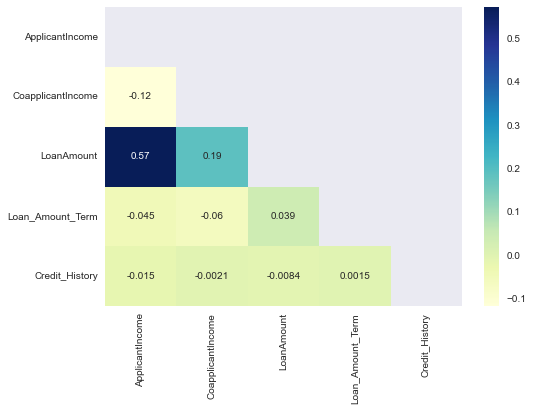

In [17]:
# creating mask
mask = np.triu(np.ones_like(train.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()


In [19]:
col=train.columns
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status','Loan_Amount_Term']

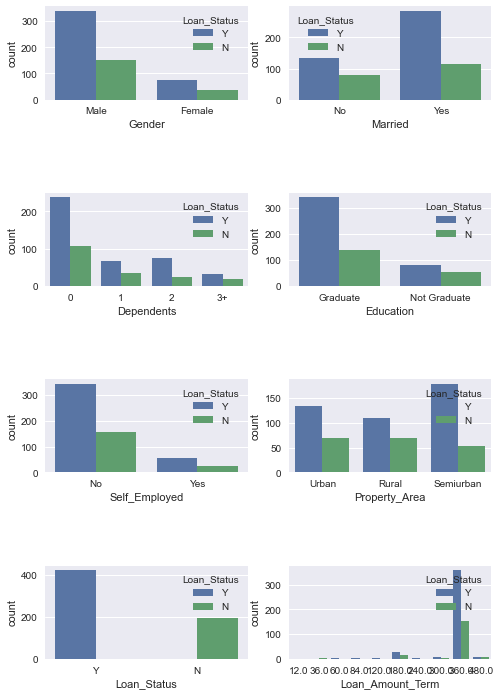

In [21]:
fig,axes = plt.subplots(4,2,figsize=(8,12))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Plots above convey following things about the dataset:

Loan Approval Status: About 2/3rd of applicants have been granted loan.

Sex: There are more Men than Women. which leads to wrong predictions better to drop it

Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

Employment: 5/6th of population is not self employed.

Property Area: More applicants from Semi-urban and also likely to be granted loans.

Applicant with credit history are far more likely to be accepted.

Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

In [22]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


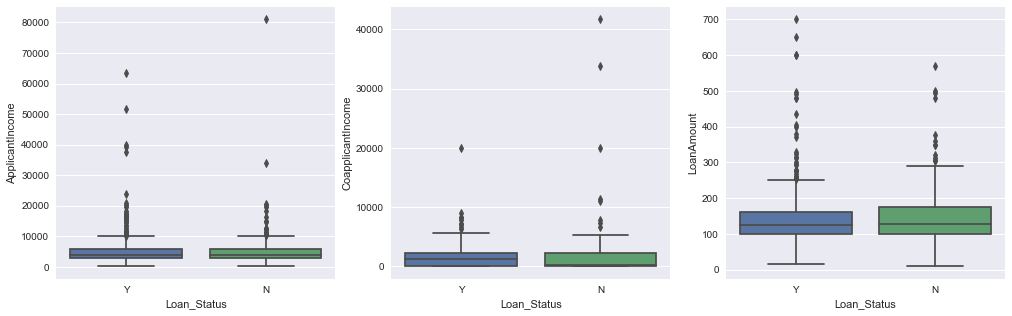

In [24]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate(numerical_columns):
    sns.boxplot(y=num_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

for Numerical. colunmns, there is no significant realtion to loan approval status


filling Missing value for train dataset

In [36]:
train['Dependents'] = train['Dependents'].replace(to_replace = '3+', value = 4)
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

filling Missing value for test dataset

In [37]:
test["Dependents"]=test["Dependents"].fillna(0)
test["Dependents"]=test["Dependents"].replace("3+",4)
test["Gender"]=test["Gender"].fillna(test["Gender"].mode()[0])
test["Self_Employed"]=test["Self_Employed"].fillna(test["Self_Employed"].mode()[0])
test["LoanAmount"]=test["LoanAmount"].fillna(test["LoanAmount"].median())
test["Loan_Amount_Term"]=test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].median())
test["Credit_History"]=test["Credit_History"].fillna(test["Credit_History"].mean())


In [38]:
print("Total missing values in Train: ",train.isnull().sum().sum())
print("Total missing values in Test: ",test.isnull().sum().sum())

Total missing values in Train:  0
Total missing values in Test:  0


Use Label encoder

In [39]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['Gender']= label_encoder.fit_transform(train['Gender'])
train['Married']= label_encoder.fit_transform(train['Married'])
train['Education']= label_encoder.fit_transform(train['Education'])
train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed'])
train['Credit_History']= label_encoder.fit_transform(train['Credit_History'])
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status'])

trainX=train.iloc[:,1:-1]
trainY=train.iloc[:,-1]

trainX

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0
610,1,1,4,0,0,4106,0.0,40.0,180.0,1,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2


In [40]:
test['Gender']= label_encoder.fit_transform(test['Gender'])
test['Married']= label_encoder.fit_transform(test['Married'])
test['Education']= label_encoder.fit_transform(test['Education'])
test['Self_Employed']= label_encoder.fit_transform(test['Self_Employed'])
test['Credit_History']= label_encoder.fit_transform(test['Credit_History'])
test['Property_Area']= label_encoder.fit_transform(test['Property_Area'])

testX=test.iloc[:,1:]

testX


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,1,1,2,0,0,2340,2546,100.0,360.0,2,2
4,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,4,1,1,4009,1777,113.0,360.0,1,2
363,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,1,0,0,0,0,3250,1993,126.0,360.0,2,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1,0


Model building

In [43]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(trainX,trainY)
Y_pred=knn.predict(testX)
print((Y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [44]:
#Logistic Regresssion
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(trainX,trainY)
Y_pred = logreg.predict(testX)
print((Y_pred))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
#----------------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")



In [47]:
grid_search.fit(trainX,trainY)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [48]:
Y_pred=grid_search.predict(testX)
print((Y_pred))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


#Submission File

test=pd.read_csv("test.csv")
submission_file=pd.read_csv('sample_submission_49d68Cx.csv')
submission_file['Loan_ID'] = test['Loan_ID']

submission_file['Loan_Status'] = Y_pred
submission_file.to_csv('sample_submihttps://scikit-learn.org/stable/modules/preprocessing.htmlssion_49d68Cx.csv', index=False)

submission_file['Loan_Status'] = submission_file['Loan_Status'].map({1: 'Y', 0: 'N'})

submission_file.to_csv('sample_submission2.csv', index=False)

Result-

After Submission of each Machine learning Model reults are-

1)kNN algorithm's accurucy score is 0.701388888888889.

2)Logistic regression's algorithm score is 0.770833333333333.

3)Rondom Forest's algorithm score is 0.777777777777778.

so as per results Random Forest gives more efficient accurucy for this project.

LIVE PROJECT RANK_4299